# What Were the Top 10 Most Skipped Songs for This User?

*Setup*

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Sources/spotify_history.csv", parse_dates=['ts'])
print(df.shape)
df.head()

(149860, 11)


,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


*Wrangle the data*

In [65]:
skipped = df.copy()
skipped = skipped[skipped["skipped"] == True]
mapping_artist = skipped.set_index("spotify_track_uri")["artist_name"].to_dict()

top10skipped = skipped["spotify_track_uri"].value_counts().head(10)
top10skipped_df = top10skipped.reset_index()
top10skipped_df["artist_name"] = top10skipped_df["spotify_track_uri"].map(mapping_artist)

mapping_track = skipped.set_index("spotify_track_uri")["track_name"].to_dict()
top10skipped_df["track_name"] = top10skipped_df["spotify_track_uri"].map(mapping_track)
top10skipped_df

,spotify_track_uri,count,artist_name,track_name
0,6y63IkVtjr2RnPVvK8BqEj,29,Dvicio,Paraíso
1,1HNkqx9Ahdgi1Ixy2xkKkL,21,Ed Sheeran,Photograph
2,6HTJZ0TQJVMSKkUGzAOe2h,19,Matoma,Old Thing Back (feat. Ja Rule and Ralph Tresvant)
3,6nRwc5GgNvBMkKaynhQzrm,19,Justin Bieber,What Do You Mean?
4,70OTIpw8x8UXUsuCHW9i1i,18,One Direction,Drag Me Down
5,3PuKf5pn248yPymkQdcaeT,17,The Last Bison,Switzerland
6,1njCkadQm2hGaajHFIBxdW,16,David Bisbal,Diez Mil Maneras
7,52RIwrVO4z30hkTsSWOYyL,15,Banda Tierra Sagrada,La Buena y la Mala
8,5MNRv4XYIXjEG34dxf747J,14,We The Kings,Just Keep Breathing
9,7yR50dqQ9I4fyvbk3pHfgl,14,We The Kings,Queen of Hearts


These are the top 10 most skipped songs of all time for this user.

# How Much Is This User Listening to Music Over Time?

*Set Grid Style*

In [95]:
sns.set_style("whitegrid")

*Wrangle the Data and Plot the Grid*

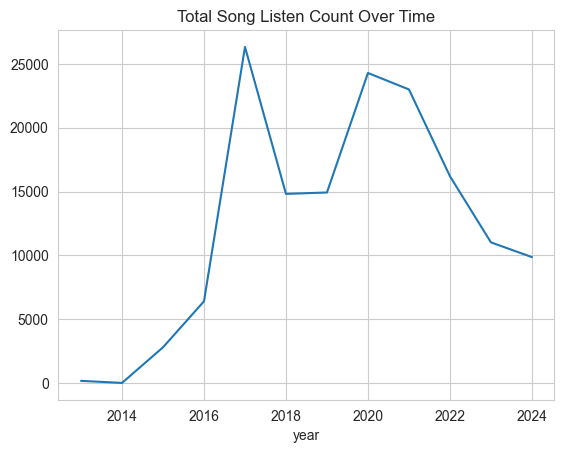

In [102]:
df["year"] = df["ts"].dt.year
total_listens_by_year = df.groupby("year")["spotify_track_uri"].count()
total_listens_by_year.plot(kind="line", title="Total Song Listen Count Over Time")
plt.show()

It appears that the user listened the most in 2017 and 2020 but that recently their listening is trending downward.

# Who Was the Top Artist for 2017?

In [97]:
df2017 = df[df["ts"].dt.year == 2017]
top_artists2017 = df2017["artist_name"].value_counts().head(5)
top_artists2017

artist_name
The Beatles    3244
John Mayer     1382
The Killers    1275
Bob Dylan       789
Radiohead       651
Name: count, dtype: int64

This user listened to The Beatles the most in 2017, with a whopping 3,244 listens (that's almost 2,000 more than the next most listened to artist).